In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv(filepath_or_buffer="timestamp_from_id_events_2015_03_31_22_00_00.csv", parse_dates=['timestamp'])

In [3]:
df_ps = pd.read_csv(filepath_or_buffer="delivery_start_from_id_prod_specs_2015_03_31_22_00_00.csv", parse_dates=['trading_start'])

In [ ]:
df

In [ ]:
df_ps

In [ ]:
type(df['timestamp'])

In [ ]:
df['timestamp'][0]

In [ ]:
np.float64(df['timestamp'].values)

In [4]:
from tick.base import TimeFunction
from tick.plot import plot_point_process, stems

ModuleNotFoundError: No module named 'tick'

In [ ]:
df_ps['trading_start'].values

In [5]:
np.float64(df_ps['trading_start'].values)

1.4278068e+18

Tick dates (starting at the opening market date, in hours)

In [7]:
time_vec =(np.float64(df['timestamp'].values - df_ps['trading_start'].values))/(1e9*3600*8.25)

In [8]:
time_vec

array([0.02565364, 0.02566441, 0.02733848, 0.02778677, 0.02813805,
       0.27321673, 0.43988865, 0.44131471, 0.44370539, 0.44620111,
       0.47267879, 0.47549899, 0.48275848, 0.48924535, 0.59038441,
       0.6160898 , 0.65693276, 0.6587633 , 0.78167778, 0.78514007,
       0.78547215, 0.78557128, 0.78563121, 0.80400337, 0.80413189,
       0.81137946, 0.81146094, 0.85103121, 0.86005926, 0.86872165,
       0.87320495, 0.88106374, 0.90272896, 0.92120067, 0.922433  ,
       0.92353007, 0.92476205, 0.92513963, 0.92596017, 0.92684175,
       0.93012704, 0.9391266 , 0.94047407, 0.9422531 , 0.94225377,
       0.94225566, 0.94338192, 0.94347441, 0.94388956, 0.95162761,
       0.95487249, 0.95544906, 0.95641236, 0.95952178, 0.96946879,
       0.96948003, 0.97292886, 0.97527013, 0.98131135, 0.98203636,
       0.99081505, 0.99789842, 0.99801606, 0.99813391, 0.99867609,
       0.99886296, 0.9990164 , 0.99914545, 0.99934343, 0.99954367,
       0.99968643, 0.99972727, 0.99989495, 0.99989721, 0.99999

One observation of the process $N(t)$

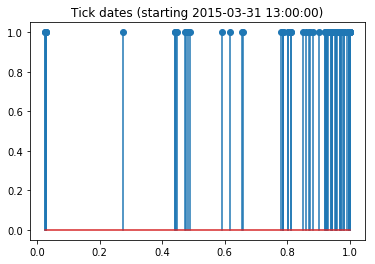

In [9]:
plt.stem(time_vec, np.ones(len(time_vec)))
plt.title('Tick dates (starting 2015-03-31 13:00:00)')
plt.show()

Empirical evidence : a Poisson process cannot model this data

In [10]:
interarrival = time_vec[1:] - time_vec[:-1]

In [11]:
interarrival

array([1.07744108e-05, 1.67407407e-03, 4.48282828e-04, 3.51279461e-04,
       2.45078687e-01, 1.66671919e-01, 1.42606061e-03, 2.39067340e-03,
       2.49572391e-03, 2.64776768e-02, 2.82020202e-03, 7.25949495e-03,
       6.48686869e-03, 1.01139057e-01, 2.57053872e-02, 4.08429630e-02,
       1.83053872e-03, 1.22914478e-01, 3.46228956e-03, 3.32087542e-04,
       9.91245791e-05, 5.99326599e-05, 1.83721549e-02, 1.28518519e-04,
       7.24757576e-03, 8.14814815e-05, 3.95702694e-02, 9.02804714e-03,
       8.66239057e-03, 4.48329966e-03, 7.85878788e-03, 2.16652189e-02,
       1.84717172e-02, 1.23232323e-03, 1.09707071e-03, 1.23198653e-03,
       3.77575758e-04, 8.20538721e-04, 8.81582492e-04, 3.28528620e-03,
       8.99956229e-03, 1.34747475e-03, 1.77902357e-03, 6.73400673e-07,
       1.88552189e-06, 1.12626263e-03, 9.24915825e-05, 4.15151515e-04,
       7.73804714e-03, 3.24488215e-03, 5.76565657e-04, 9.63299663e-04,
       3.10942761e-03, 9.94700337e-03, 1.12457912e-05, 3.44882155e-03,
      

In [12]:
import statsmodels.api as sm
import scipy.stats as stats

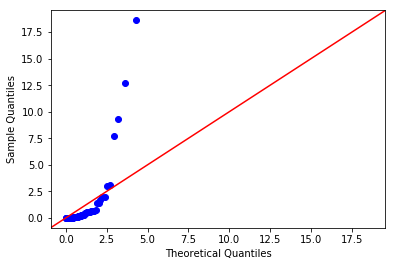

In [13]:
fig = sm.qqplot(interarrival,stats.expon,fit=True, line='45')
plt.show()

In [14]:
filename_a ="timestamp_"
filename_c =".csv"
filename_ps_a ="delivery_start_"

In [15]:
dates = pd.read_csv(filepath_or_buffer="dates_avril_2015.csv",parse_dates=["date"])

In [16]:
N = len(dates)

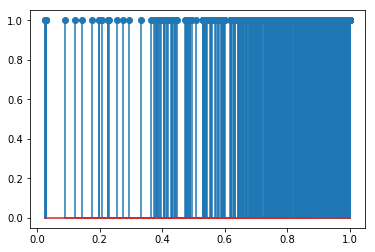

In [17]:
timestamps_N = np.array([])
for i in range(N):
    s = filename_a + str(i) + filename_c
    s_ps = filename_ps_a + str(i) + filename_c
    df = pd.read_csv(filepath_or_buffer=s, parse_dates=['timestamp'])
    df_ps = pd.read_csv(filepath_or_buffer=s_ps, parse_dates=['trading_start'])
    time_vec =(np.float64(df['timestamp'].values - df_ps['trading_start'].values))/(1e9*3600*8.25)
    plt.stem(time_vec, np.ones(len(time_vec)))
    timestamps_N =np.concatenate((timestamps_N, time_vec))
timestamps_N.sort()

In [ ]:
timestamps_N

In [18]:
len(timestamps_N)

1173

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(10, 4))
ax.set_xlim(0, 1)
plt.stem(timestamps_N, np.ones(len(timestamps_N)))
plt.title('Tick dates')
plt.show()

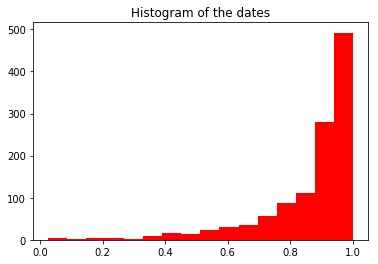

In [19]:
plt.hist(timestamps_N,bins=16,color="red")
plt.title("Histogram of the dates")
plt.show()

Empirical covariance of distinct time intervals

In [20]:
df_avril =pd.read_csv(filepath_or_buffer="dates_avril_2015.csv", parse_dates=['date'])
liste_date = df_avril['date'].tolist()
n = len(liste_date)
filename_a ="timestamp_"
filename_c =".csv"
filename_ps_a ="delivery_start_"
ticks_avril_2015 = []
for i in range(n):
    s = filename_a + str(i) + filename_c
    s_ps = filename_ps_a + str(i) + filename_c    
    df_i = pd.read_csv(filepath_or_buffer=s, parse_dates=['timestamp'])
    df_ps_i = pd.read_csv(filepath_or_buffer=s_ps, parse_dates=['trading_start']) 
    ticks_avril_2015.append((np.float64(df_i['timestamp'].values - df_ps_i['trading_start'].values))/(1e9*3600*8.25))

In [33]:
ticks_avril_2015

[array([0.02565364, 0.02566441, 0.02733848, 0.02778677, 0.02813805,
        0.27321673, 0.43988865, 0.44131471, 0.44370539, 0.44620111,
        0.47267879, 0.47549899, 0.48275848, 0.48924535, 0.59038441,
        0.6160898 , 0.65693276, 0.6587633 , 0.78167778, 0.78514007,
        0.78547215, 0.78557128, 0.78563121, 0.80400337, 0.80413189,
        0.81137946, 0.81146094, 0.85103121, 0.86005926, 0.86872165,
        0.87320495, 0.88106374, 0.90272896, 0.92120067, 0.922433  ,
        0.92353007, 0.92476205, 0.92513963, 0.92596017, 0.92684175,
        0.93012704, 0.9391266 , 0.94047407, 0.9422531 , 0.94225377,
        0.94225566, 0.94338192, 0.94347441, 0.94388956, 0.95162761,
        0.95487249, 0.95544906, 0.95641236, 0.95952178, 0.96946879,
        0.96948003, 0.97292886, 0.97527013, 0.98131135, 0.98203636,
        0.99081505, 0.99789842, 0.99801606, 0.99813391, 0.99867609,
        0.99886296, 0.9990164 , 0.99914545, 0.99934343, 0.99954367,
        0.99968643, 0.99972727, 0.99989495, 0.99

In [54]:
q=10
disc=np.zeros((n,q+1))

In [55]:
for i in range(n):
    for j in range(q+1):
        disc[i][j] = len(np.where( ticks_avril_2015[i][:] <=((j)/q))[0])

In [60]:
valuetab = disc[:,1:] - disc[:,:-1]

In [65]:
np.cov(valuetab.T)

array([[ 8.55172414e-01, -3.44827586e-02,  1.24137931e-01,
        -6.89655172e-03,  1.20000000e+00, -1.31034483e-01,
         2.48275862e-01,  2.55172414e-01,  1.72413793e-01,
         3.05517241e+00],
       [-3.44827586e-02,  1.43678161e-01, -5.74712644e-03,
         5.74712644e-03, -8.04597701e-02,  5.74712644e-02,
        -2.12643678e-01, -2.41379310e-01, -4.02298851e-02,
         8.39080460e-01],
       [ 1.24137931e-01, -5.74712644e-03,  2.54022989e-01,
         8.39080460e-02,  4.45977011e-01,  6.45977011e-01,
         2.26436782e-01, -1.79310345e-01,  2.81609195e-01,
        -1.77011494e-01],
       [-6.89655172e-03,  5.74712644e-03,  8.39080460e-02,
         7.22988506e-01,  6.36781609e-01,  6.43678161e-02,
        -6.78160920e-02,  3.93103448e-01,  1.23563218e+00,
        -6.91954023e-01],
       [ 1.20000000e+00, -8.04597701e-02,  4.45977011e-01,
         6.36781609e-01,  3.15402299e+00,  9.88505747e-02,
         7.77011494e-01,  1.18620690e+00,  2.04597701e+00,
         5.

In [68]:
np.savetxt("mydata.csv", np.cov(valuetab.T), delimiter=' & ', fmt='%2.2e', newline=' \\\\\n')

In [61]:
q = 30
discretized = np.zeros(q)
for i in range(q):
    discretized[i] = len(np.where( timestamps_N <=((i+1)/q))[0])

In [62]:
discretized

array([   5.,    5.,    6.,    7.,    8.,   11.,   15.,   16.,   18.,
         19.,   20.,   29.,   39.,   43.,   55.,   64.,   77.,   99.,
        108.,  127.,  148.,  179.,  221.,  256.,  305.,  376.,  491.,
        645.,  906., 1173.])

In [32]:
discretized[1:] - discretized[:-1]

array([  5.,   7.,  11.,  26.,  44.,  49., 108., 235., 682.])

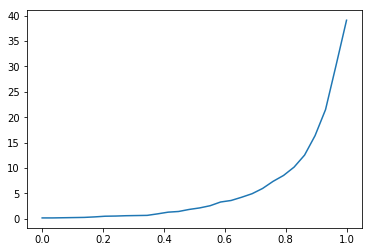

In [63]:
plt.plot(np.linspace(0,1,q),discretized/N)
plt.show()

Plot of the estimator of $e(t) = m(t) + m \star \psi (t)$ for $t \in [0,1]$

In [ ]:
data_N = pd.DataFrame({"ticks":timestamps_N})

In [ ]:
data_N.to_csv("ticks_0_1.csv")